# Clustering Kmeans

### Primer ejemplo

In [5]:
# Data
import pandas as pd
data_dic = {
    "annos_exp":[1, 2, 5, 5],
    "salario_miles":[1, 2, 6, 7],

}
data = pd.DataFrame(data_dic)
data

,annos_exp,salario_miles
0,1,1
1,2,2
2,5,6
3,5,7


In [9]:
# Algoritmo Kmeans
from sklearn.cluster import KMeans
modelo = KMeans(n_clusters = 2) # k=2, es decir 2 clusters
modelo.fit(data)
modelo.labels_ # mostra la pertencia al cluster
modelo.cluster_centers_

array([[5. , 6.5],
       [1.5, 1.5]])

In [8]:
data["cluster"] = modelo.labels_
data

,annos_exp,salario_miles,cluster
0,1,1,1
1,2,2,1
2,5,6,0
3,5,7,0


### Segundo ejemplo IRIS

In [26]:
# Carga de data
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
data = pd.DataFrame(iris.data[:,[2,3]], columns = ["Petal_Length","Petal_Width"])
especies = pd.DataFrame(iris.target, columns=["Target"])

In [ ]:
# Graficar datos (SIN considerar resultados kmeans)
import matplotlib.pyplot as plt
import numpy as np
colores = np.array(["red","green","blue"])
plt.scatter(data["Petal_Length"], data["Petal_Width"], c = colores[especies["Target"]])
plt.title("Sin KMeans")
plt.xlabel("Petal_Length")
plt.ylabel("Petal_Width")

In [ ]:
# Aplicar kmeans
from sklearn.cluster import KMeans
modelo2 = KMeans(n_clusters = 3) # K=3
modelo2.fit(data)
modelo2.labels_ # asignacion de cluters
modelo2.cluster_centers_ # centroides

In [ ]:
# Graficar datos (considerando resultados kmeans)
import matplotlib.pyplot as plt
plt.scatter(data["Petal_Length"], data["Petal_Width"], c = modelo2.labels_)
plt.title("CON KMeans")
plt.xlabel("Petal_Length")
plt.ylabel("Petal_Width")

In [ ]:
# Como determinamos el el valor de k ideal. Usar Metodo codo
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Metodo del codo")
plt.xlabel("k")
plt.ylabel("wcss")

# Regresión Lineal

In [41]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/maxalonzohuaman/datasets/main/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.isnull().sum() # verificar existencia de valor nulos

In [45]:
# Coeficientes de correlación Pearson
corr = df.corr()
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
# Diagrama dispersion
import matplotlib.pyplot as plt
plt.scatter(df["rm"],df["medv"])
plt.xlabel("rm")
plt.ylabel("medv")

Text(0, 0.5, 'medv')

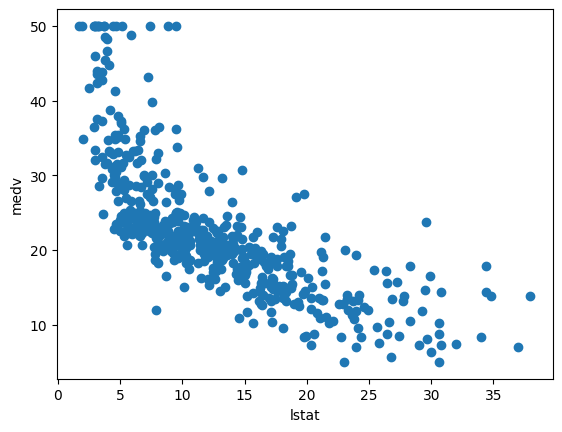

In [51]:
import matplotlib.pyplot as plt
plt.scatter(df["lstat"],df["medv"])
plt.xlabel("lstat")
plt.ylabel("medv")

In [53]:
import numpy as np
x = df[["lstat","rm"]]
y = df["medv"]

In [ ]:
# Base de train y test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [62]:
# Aplicar Regresion Lineal
from sklearn.linear_model import LinearRegression
modelo3 = LinearRegression()
modelo3.fit(x_train, y_train)
beta0 = modelo3.intercept_ # Beta0
beta1 = modelo3.coef_[0] # Beta1
beta2 = modelo3.coef_[1] # Beta2

In [65]:
# Predicciones
valor_lstat = 30
valor_rm = 5
valor_metodo = modelo3.predict([[valor_lstat, valor_rm]]) # con metodo predict
print(valor_metodo)
valor_manual = beta0 + beta1*valor_lstat + beta2*valor_rm
print(valor_manual)

[4.86910115]
4.869101146034332


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [66]:
y_pred = modelo3.predict(x_test)

In [70]:
# Medir el ajuste modelo
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(y_test, y_pred)
mse
rmse = mse**(1/2)

1.983925259710431

# Regresion Logistica

In [74]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/maxalonzohuaman/datasets/main/train_titanic.csv")
data.head()
data.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
data = data[["Pclass","Sex","Age","Survived","Parch","SibSp"]]
data.head()

,Pclass,Sex,Age,Survived,Parch,SibSp
0,3,male,22.0,0,0,1
1,1,female,38.0,1,0,1
2,3,female,26.0,1,0,0
3,1,female,35.0,1,0,1
4,3,male,35.0,0,0,0


In [77]:
data["Sex"] = data["Sex"].map({"male":1,"female":0}) # codificar variable categoria

In [81]:
data.shape
data.isnull().sum()
data = data.dropna()
data.shape

(714, 6)

In [82]:
x = data[["Pclass","Sex","Age","Parch","SibSp"]]
y = data[["Survived"]]

In [83]:
# Train y test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.2)

In [87]:
# Regresion Logistica
from sklearn.linear_model import LogisticRegression
modelo4 = LogisticRegression()
modelo4.fit(x_train, y_train)
beta0 = modelo4.intercept_
beta = modelo4.coef_

array([[-0.94662688, -2.33350343, -0.04032894, -0.00421346, -0.7108534 ]])

In [92]:
# Predicciones
v_Pclass, v_Sex, v_Age, v_Parch, v_SibSp = 3, 1, 50, 0, 0
modelo4.predict([[v_Pclass, v_Sex, v_Age, v_Parch, v_SibSp]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])